In [15]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
base_dir = '/home/fabian/dataset/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [19]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [27]:
model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(lr=0.0001), metrics = ['accuracy'])

In [31]:
train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [33]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [34]:
history = model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50,
    verbose = 2
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 - 7s - loss: 0.6889 - accuracy: 0.5420 - val_loss: 0.6694 - val_accuracy: 0.5090
Epoch 2/100
100/100 - 6s - loss: 0.6560 - accuracy: 0.6040 - val_loss: 0.6289 - val_accuracy: 0.6510
Epoch 3/100
100/100 - 6s - loss: 0.6011 - accuracy: 0.6790 - val_loss: 0.5924 - val_accuracy: 0.6820
Epoch 4/100
100/100 - 6s - loss: 0.5626 - accuracy: 0.7130 - val_loss: 0.5756 - val_accuracy: 0.6970
Epoch 5/100
100/100 - 6s - loss: 0.5353 - accuracy: 0.7365 - val_loss: 0.5639 - val_accuracy: 0.7150
Epoch 6/100
100/100 - 6s - loss: 0.5088 - accuracy: 0.7410 - val_loss: 0.5890 - val_accuracy: 0.7010
Epoch 7/100
100/100 - 6s - loss: 0.4858 - accuracy: 0.7600 - val_loss: 0.5814 - val_accuracy: 0.6920
Epoch 8/100
100/100 - 6s - loss: 0.4537 - accuracy: 0.7840 - val_loss: 0.5458 - val_accuracy: 0.7320
Epoch 9/100
100/100 - 6s - loss: 0.4397 - accuracy: 0.7840 - val_loss: 0.5601 - val_accuracy: 0.725

Epoch 80/100
100/100 - 6s - loss: 0.0144 - accuracy: 0.9970 - val_loss: 1.9599 - val_accuracy: 0.7520
Epoch 81/100
100/100 - 6s - loss: 0.0093 - accuracy: 0.9975 - val_loss: 2.0995 - val_accuracy: 0.7500
Epoch 82/100
100/100 - 6s - loss: 3.1494e-04 - accuracy: 1.0000 - val_loss: 2.1148 - val_accuracy: 0.7560
Epoch 83/100
100/100 - 6s - loss: 0.0058 - accuracy: 0.9980 - val_loss: 2.0778 - val_accuracy: 0.7550
Epoch 84/100
100/100 - 6s - loss: 6.9696e-05 - accuracy: 1.0000 - val_loss: 2.1448 - val_accuracy: 0.7590
Epoch 85/100
100/100 - 6s - loss: 0.0085 - accuracy: 0.9970 - val_loss: 2.1775 - val_accuracy: 0.7590
Epoch 86/100
100/100 - 6s - loss: 0.0031 - accuracy: 0.9985 - val_loss: 2.2119 - val_accuracy: 0.7520
Epoch 87/100
100/100 - 6s - loss: 0.0052 - accuracy: 0.9985 - val_loss: 2.0163 - val_accuracy: 0.7560
Epoch 88/100
100/100 - 6s - loss: 2.1552e-05 - accuracy: 1.0000 - val_loss: 2.1638 - val_accuracy: 0.7550
Epoch 89/100
100/100 - 6s - loss: 0.0084 - accuracy: 0.9980 - val_loss

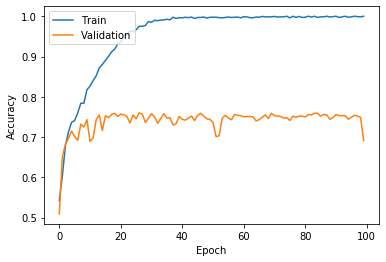

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

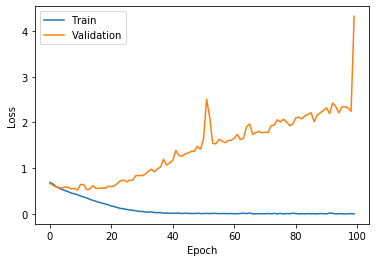

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()